#  Predicting University Rankings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# for scaling data
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('cwurData.csv')
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [4]:
df.drop('institution',axis=1,inplace=True)


In [5]:
df.drop('year',axis=1,inplace=True)

<AxesSubplot:>

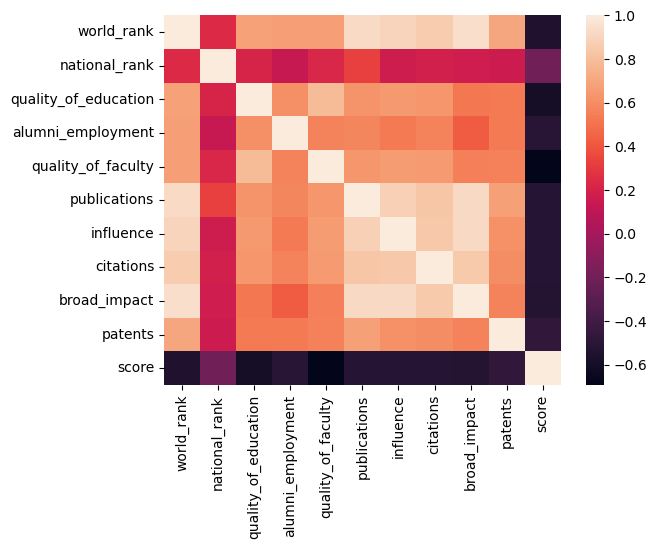

In [6]:
# the broad impact columns have alot of nan values so we need to check the corelation
# between world rank and broad_impact column

sns.heatmap(df.corr())

In [7]:
df.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810


In [8]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000


In [9]:
# checking null values
df.isnull().sum()

world_rank                0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
dtype: int64

In [11]:
# filling null values with mean'
df['broad_impact']=df['broad_impact'].fillna(df['broad_impact'].mean())


In [12]:
# encoding the country column into numerical value
encoder = LabelEncoder()
df['country']= encoder.fit_transform(df['country'])
country_mappings={index:label for index,label in enumerate(encoder.classes_)}

In [13]:
country_mappings


{0: 'Argentina',
 1: 'Australia',
 2: 'Austria',
 3: 'Belgium',
 4: 'Brazil',
 5: 'Bulgaria',
 6: 'Canada',
 7: 'Chile',
 8: 'China',
 9: 'Colombia',
 10: 'Croatia',
 11: 'Cyprus',
 12: 'Czech Republic',
 13: 'Denmark',
 14: 'Egypt',
 15: 'Estonia',
 16: 'Finland',
 17: 'France',
 18: 'Germany',
 19: 'Greece',
 20: 'Hong Kong',
 21: 'Hungary',
 22: 'Iceland',
 23: 'India',
 24: 'Iran',
 25: 'Ireland',
 26: 'Israel',
 27: 'Italy',
 28: 'Japan',
 29: 'Lebanon',
 30: 'Lithuania',
 31: 'Malaysia',
 32: 'Mexico',
 33: 'Netherlands',
 34: 'New Zealand',
 35: 'Norway',
 36: 'Poland',
 37: 'Portugal',
 38: 'Puerto Rico',
 39: 'Romania',
 40: 'Russia',
 41: 'Saudi Arabia',
 42: 'Serbia',
 43: 'Singapore',
 44: 'Slovak Republic',
 45: 'Slovenia',
 46: 'South Africa',
 47: 'South Korea',
 48: 'Spain',
 49: 'Sweden',
 50: 'Switzerland',
 51: 'Taiwan',
 52: 'Thailand',
 53: 'Turkey',
 54: 'USA',
 55: 'Uganda',
 56: 'United Arab Emirates',
 57: 'United Kingdom',
 58: 'Uruguay'}

In [14]:
df

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,54,1,7,9,1,1,1,1,496.6995,5,100.00
1,2,54,2,9,17,3,12,4,4,496.6995,1,91.67
2,3,54,3,17,11,5,4,2,2,496.6995,15,89.50
3,4,57,1,10,24,4,16,16,11,496.6995,50,86.17
4,5,54,4,2,29,7,37,22,22,496.6995,18,85.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,37,7,367,567,218,926,845,812,969.0000,816,44.03
2196,997,14,4,236,566,218,997,908,645,981.0000,871,44.03
2197,998,4,18,367,549,218,830,823,812,975.0000,824,44.03
2198,999,48,40,367,567,218,886,974,812,975.0000,651,44.02


In [15]:
# Dependent and Independent variables
y = df['world_rank']
X = df.drop('world_rank',axis=1)

In [16]:
# Scaling X
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [17]:
X

,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1.035555,-0.759305,-2.199214,-1.864211,-2.777926,-1.511102,-1.512871,-1.560375,2.078379e-16,-1.563683,6.727841
1,1.035555,-0.739974,-2.182808,-1.821370,-2.746694,-1.474881,-1.502979,-1.549025,2.078379e-16,-1.578285,5.654255
2,1.035555,-0.720642,-2.117185,-1.853501,-2.715462,-1.501224,-1.509574,-1.556592,2.078379e-16,-1.527178,5.374581
3,1.191751,-0.759305,-2.174605,-1.783884,-2.731078,-1.461710,-1.463409,-1.522540,2.078379e-16,-1.399410,4.945405
4,1.035555,-0.701311,-2.240229,-1.757109,-2.684229,-1.392561,-1.443625,-1.480922,2.078379e-16,-1.516227,4.821678
...,...,...,...,...,...,...,...,...,...,...,...
2195,0.150445,-0.643316,0.753847,1.123952,0.610775,1.534754,1.270193,1.508032,1.726883e+00,1.396881,-0.485678
2196,-1.047057,-0.701311,-0.320739,1.118597,0.610775,1.768544,1.477933,0.876190,1.770759e+00,1.597659,-0.485678
2197,-1.567710,-0.430670,0.753847,1.027560,0.610775,1.218643,1.197648,1.508032,1.748821e+00,1.426085,-0.485678
2198,0.723163,-0.005378,0.753847,1.123952,0.610775,1.403041,1.695566,1.508032,1.748821e+00,0.794547,-0.486967


In [18]:
# creating training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75)

In [19]:
# using linear regression model 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# testing the accuracy score
model.score(X_test,y_test)

0.9436780355176955